# Notebook Instructions

1. All the <u>code and data files</u> used in this course are available in the downloadable unit of the <u>last section of this course</u>.
2. You can run the notebook document sequentially (one cell at a time) by pressing **shift + enter**. 
3. While a cell is running, a [*] is shown on the left. After the cell is run, the output will appear on the next line.

This course is based on specific versions of python packages. You can find the details of the packages in <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank" >this manual</a>.

# Hurst Exponent

The Hurst exponent is used to study self-similarities or long term correlation in time series. The value of Hurst exponent lies between 0 and 1. 

Based on the values, the time series can be one of the following.
1. Random
2. Mean-reverting
3. Trending


In this notebook, you will learn to generate different time series and calculate Hurst exponent for them. The notebook is divided into:

1. [Random time-series](#random)
2. [Mean-reverting time-series](#mean_reverting)
3. [Trending time-series](#trending)

## Import libraries

In [1]:
# Import numpy as an alias np
import numpy as np

# Import pandas as an alias pd
import pandas as pd

# Import compute_Hc module from hurst library
from hurst import compute_Hc

# Import compute_Hc module from hurst library
from hurst import random_walk

# Import matplotlib as an alias plt and set the style
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

<a id='read'></a>
## Random time-series

A time series is called a random walk when there is no correlation between the current observations and future observations. A Hurst exponent close to 0.5 indicates that time series is a random walk.


Syntax:
```python
compute_Hc(series, kind = ‘price’)[0]
```
 
Parameter:

series: Pandas series to calculate Hurst exponent

kind = ’price’: To denote when series is a cumulative product of changes 

'The Hurst exponent is 0.51'

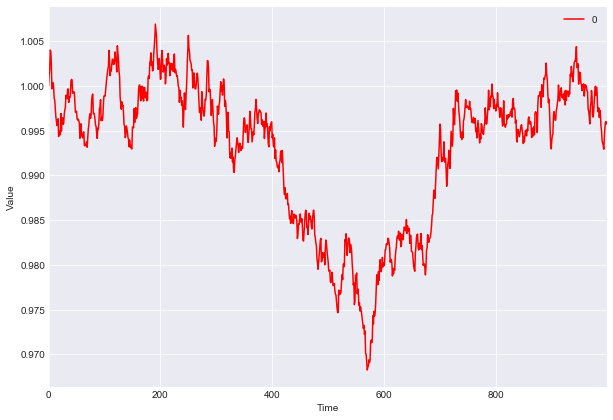

In [2]:
# Use random_walk() function to generate time series
random = random_walk(999, cumprod=True)

random = pd.DataFrame(random)

# Plot and label the time-series
random.plot(figsize=(10, 7), color='red')
plt.xlabel('Time')
plt.ylabel('Value')

# Calculate Hurst exponent
'The Hurst exponent is %.2f' % compute_Hc(random, kind='price')[0]

<a id='mean_reverting'></a>
## Mean-reverting time-series

In mean-reverting or anti-persistence time series, an increase is most likely followed by a decrease and vice-versa. A Hurst exponent between 0 and 0.5 indicates mean-reverting series. 

'The Hurst exponent is 0.03'

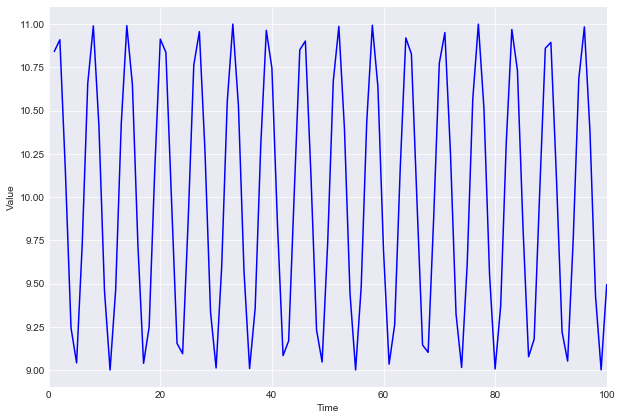

In [3]:
# Number of data points
T = 100

# Create a series of length T
sinusoidal = pd.Series(index=range(T))

# Create a sinusoidal series 
for t in range(1, 101):
    sinusoidal[t] = np.sin(t) + 10

# Plot and label the time-series
sinusoidal.plot(figsize=(10, 7), color='blue')
plt.xlabel('Time')
plt.ylabel('Value')

# Calculate Hurst exponent
'The Hurst exponent is %.2f' % compute_Hc(sinusoidal.dropna(), kind='price')[0]

'The Hurst exponent is 0.20'

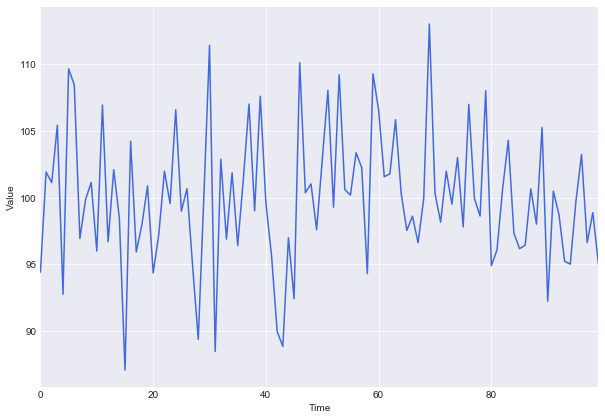

In [4]:
# Number of data points
T = 100

# Create a series of length T
mean_reverting = pd.Series(index=range(T))

# Create a normally distributed random series. 
# The parameters are mean and standard deviation of the distribution, respectively.
for t in range(T):
    mean_reverting[t] = np.random.normal(100, 5)

# Plot and label the time-series
mean_reverting.plot(figsize=(10, 7), color='royalblue')
plt.xlabel('Time')
plt.ylabel('Value')

# Calculate Hurst exponent
'The Hurst exponent is %.2f' % compute_Hc(mean_reverting, kind='price')[0]

<a id='trending'></a>
## Trending time-series

In a trending or persistent time series, an increase in values is most likely to be followed by the rise and vice-versa. A Hurst exponent of greater than 0.5 indicates a trending time series.

'The Hurst exponent is 0.68'

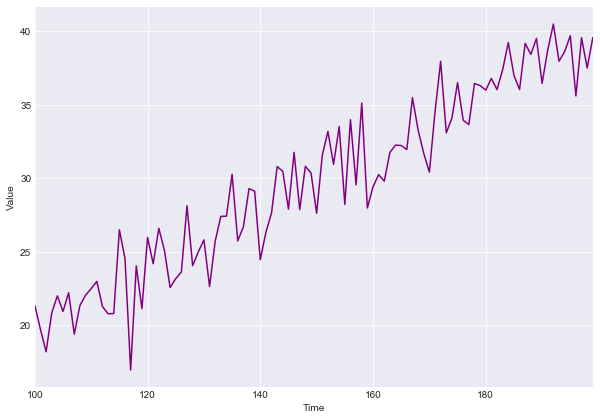

In [5]:
# Set the number of datapoints
start = 100
T = 100

# Create a series starts with index 100 to 199
trending = pd.Series(index=range(start, start+T))

# Create a normally distributed random series
for t in range(start, start+T):
    trending[t] = np.random.normal(t*0.2, 2)

# Plot and label the time-series
trending.plot(figsize=(10, 7), color='purple')
plt.xlabel('Time')
plt.ylabel('Value')

# Calculate Hurst exponent
'The Hurst exponent is %.2f' % compute_Hc(trending, kind='price')[0]

You can tweak the values of series and observe the change in the shape of time-series, along with the values of Hurst exponent.<br><br>